In [1]:
import numpy
import scipy
import torch

from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans
from torchegranate.kmeans import KMeans as KMeans2

import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,torch,pomegranate

numpy      : 1.23.4
scipy      : 1.9.3
torch      : 1.12.1
pomegranate: 0.14.8

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 4.15.0-197-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



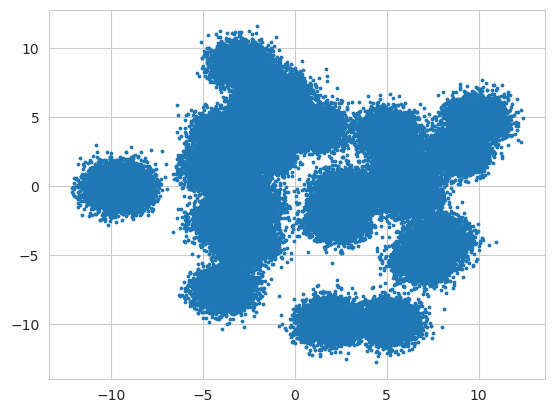

In [2]:
n, d, k = 100000, 250, 25

X, _ = make_blobs(n_samples=n, n_features=d, centers=k, cluster_std=0.75, random_state=0)

plt.scatter(*X[:,:2].T, s=3)

In [3]:
%timeit -n 1 -r 1 KMeans(k, init=X[:k], n_init=1, max_iter=50, tol=1e-2).fit(X)
%timeit -n 1 -r 1 KMeans2(k=k, init='first-k', max_iter=50, tol=1e-2).fit(X)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efd20a478b0>
Traceback (most recent call last):
  File "/home/jmschr/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jmschr/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/jmschr/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/jmschr/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


356 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efd209d28b0>
Traceback (most recent call last):
  File "/home/jmschr/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jmschr/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/jmschr/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/jmschr/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.mat

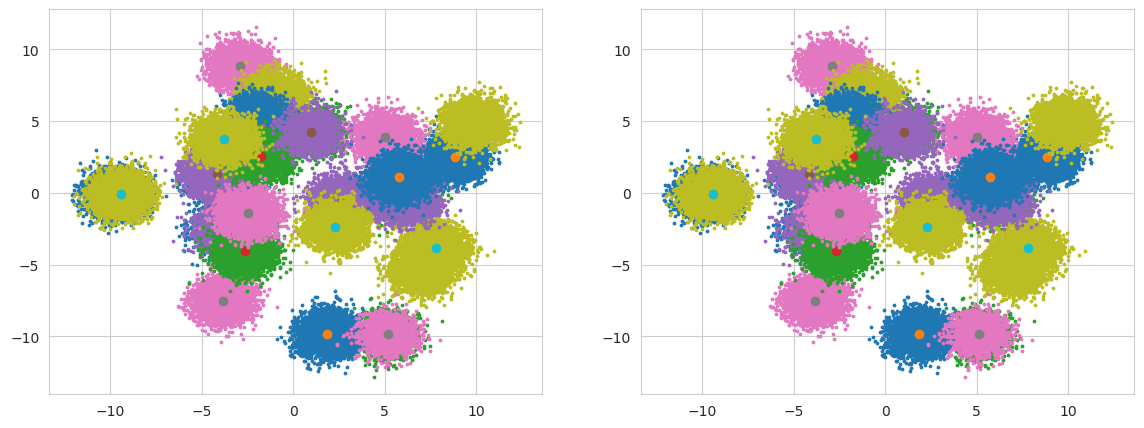

In [4]:
model_sklearn = KMeans(k, init=X[:k], n_init=1, max_iter=50, tol=1e-2).fit(X)
model_pom = KMeans2(k=k, init='first-k', max_iter=50, tol=1e-2).fit(X)

y_hat_sklearn = model_sklearn.predict(X)
y_hat_pom = model_pom.predict(X)

plt.figure(figsize=(14, 5))
plt.subplot(121)
for i in range(k):
    plt.scatter(*X[y_hat_sklearn == i, :2].T, s=3)
    plt.scatter([model_sklearn.cluster_centers_[i, 0]], [model_sklearn.cluster_centers_[i, 1]])

plt.subplot(122)
for i in range(k):
    plt.scatter(*X[y_hat_pom == i, :2].T, s=3)
    plt.scatter([model_pom.centroids[i, 0]], [model_pom.centroids[i, 1]])